In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
import math
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")


C:\Users\kseni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\kseni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#COLLECT ALL AVAILABLE DATA FOR Paris, FROM ALL YEARS
Paris_Data = pd.read_csv('Paris_data.csv')

In [3]:
#KEEP ONLY POLLUTANTS COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Paris_Data = Paris_Data.loc[:, Paris_Data.columns.intersection(cols)]
Paris_Data = Paris_Data.apply(pd.to_numeric, errors='coerce')

Paris_Data = Paris_Data.fillna(method='ffill')
Paris_Data = Paris_Data.fillna(method='bfill')

In [4]:
print("Paris:\n" + str(Paris_Data.isna().sum()))

Paris:
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


# Auto-ARIMA

In [5]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Paris_Data is stationary :")
for col in Paris_Data.columns:
    result = adfuller(Paris_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Paris_Data is stationary :
p-value for no2 : 0.000088
p-value for o3 : 0.000176
p-value for pm10 : 0.000000
p-value for pm25 : 0.000000
p-value for so2 : 0.000694


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1950.103, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1568.577, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1609.430, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1683.998, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1570.574, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1953.571, Time=1.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1930.190, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1934.934, Time=0.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1947.065, Time=1.00 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1949.180, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1950.456, Time=0.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1950.241, Time=1.28 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1955.272, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1932.019, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0

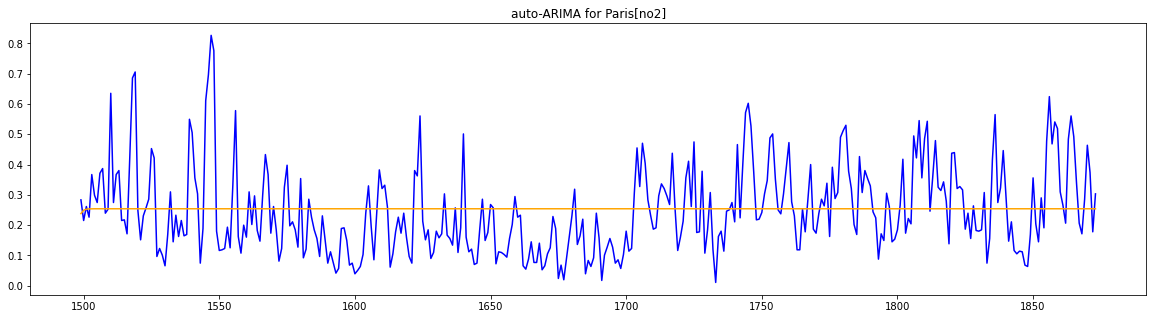

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2343.737, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2091.397, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2142.009, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2182.217, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2093.395, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2344.669, Time=1.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2293.641, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2344.839, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2344.465, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2204.790, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2346.817, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2184.214, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2144.006, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2346.444, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0

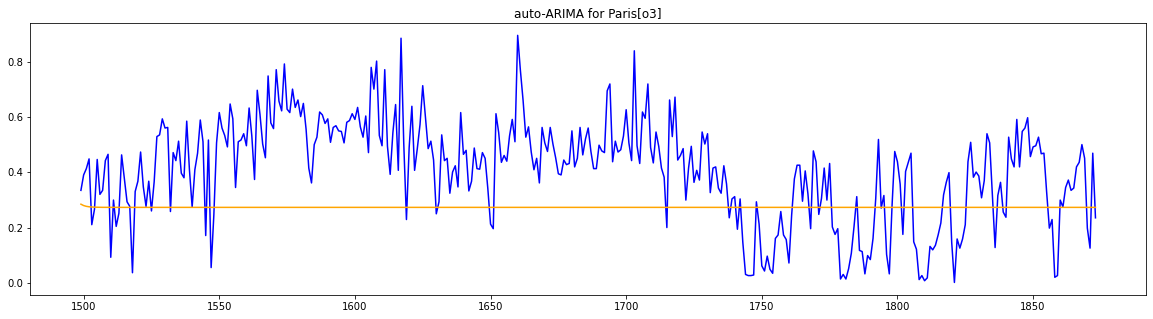

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2228.301, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2239.337, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2249.720, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2230.301, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2359.056, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2464.331, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2480.831, Time=1.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2402.047, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-2419.808, Time=1.42 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-2447.887, Time=1.43 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-2467.097, Time=1.83 sec
 ARIMA(1,1,3)(0,0,0)[0]             :

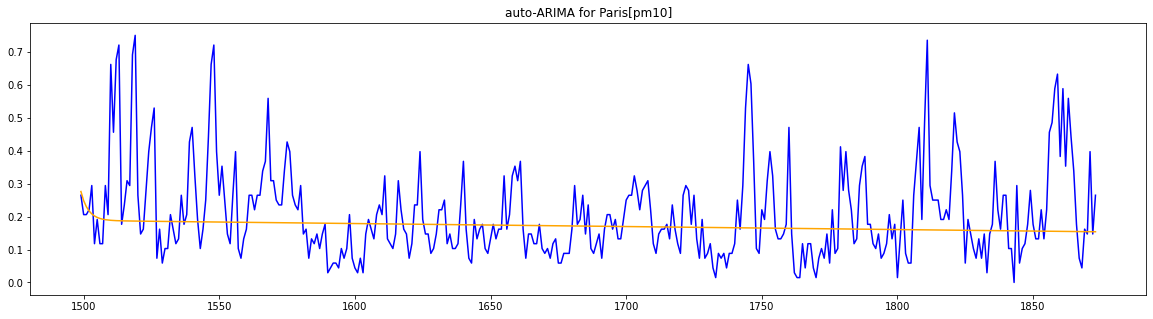

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2325.128, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2337.011, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2346.152, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2327.128, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2428.158, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2453.786, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2524.984, Time=1.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-2512.446, Time=1.43 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-2506.090, Time=1.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Ti

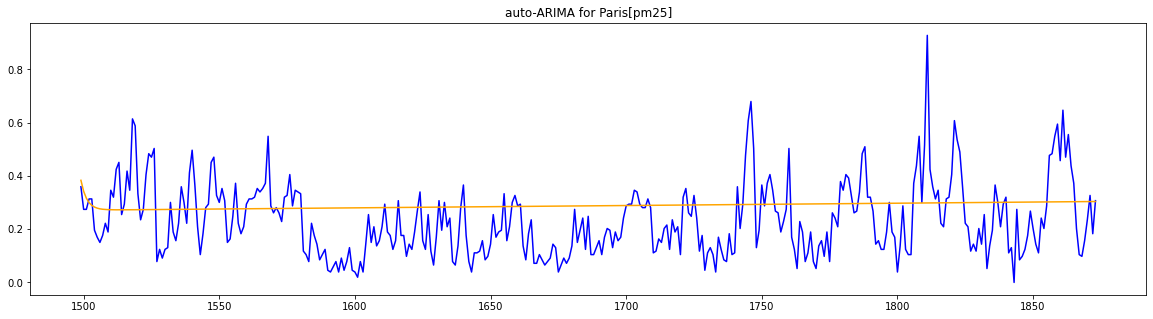

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5145.870, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4451.769, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4838.210, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5115.771, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4453.767, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5161.509, Time=1.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5135.515, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5143.588, Time=0.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5138.930, Time=1.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-5157.834, Time=1.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5166.784, Time=1.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4939.493, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5167.358, Time=1.86 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-4987.080, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0

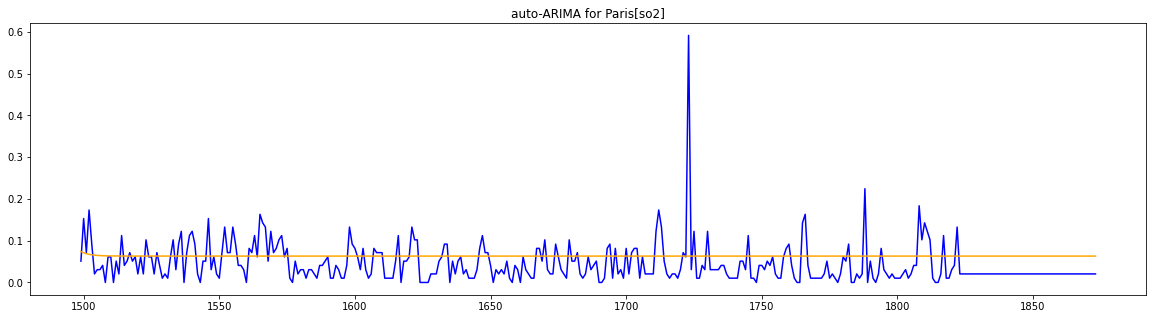

In [6]:
def auto_arima_forecast(city_data, city):
    training_percentage = 0.80
    #THERE ARE FIVE POLLUTANTS, THEREFORE FIVE TIME SERIES TO PREDICT WITH ARIMA
    for col in city_data:
        data = city_data[col]

        #SPLIT DATA INTO TRAIN AND TEST PORTIONS
        train = data[:int(training_percentage*(len(data)))]
        test = data[int(training_percentage*(len(data))):]

        #AUTO-ARIMA MODEL (data is not seasonal as seen from the graph above)
            
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
        
        #PREDICT AS MANY PERIODS AS THE 'TEST' DATASET'S LENGTH
        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
        
        #CALCULATE ERROR METRICS FOR EACH TIME SERIES
        mse = mean_squared_error(test, forecast)
        rmse = math.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)

        print("auto-ARIMA MSE for Paris[" + str(col) + "]:" + str(mse))
        print("auto-ARIMA RMSE for Paris[" + str(col) + "]:" + str(rmse))
        print("auto-ARIMA MAE for Paris[" + str(col) + "]:" + str(mae))
        
        title = "auto-ARIMA for " + city + "[" + col +"]"
        # Plot the predictions for testation set
        plt.figure(figsize=(20, 5))
        plt.title(title)
        plt.plot(test, label='Actual Data', color='blue')
        plt.plot(forecast, label='Predicted Data', color='orange')
        plt.show()

auto_arima_forecast(Paris_Data, "Paris")

# Finding optimal ARIMA parameters manually

In [7]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Paris_Data is stationary :")
for col in Paris_Data.columns:
    result = adfuller(Paris_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Paris_Data is stationary :
p-value for no2 : 0.000088
p-value for o3 : 0.000176
p-value for pm10 : 0.000000
p-value for pm25 : 0.000000
p-value for so2 : 0.000694


In [8]:
#Order of differencing (d) for 'no2'
print(ndiffs(Paris_Data['no2'], test='adf'))

#Order of differencing (d) for 'o3'
print(ndiffs(Paris_Data['o3'], test='adf'))

#Order of differencing (d) for 'pm10'
print(ndiffs(Paris_Data['pm10'], test='adf'))

#Order of differencing (d) for 'pm25'
print(ndiffs(Paris_Data['pm25'], test='adf'))

#Order of differencing (d) for 'so2'
print(ndiffs(Paris_Data['so2'], test='adf'))

0
0
0
0
0


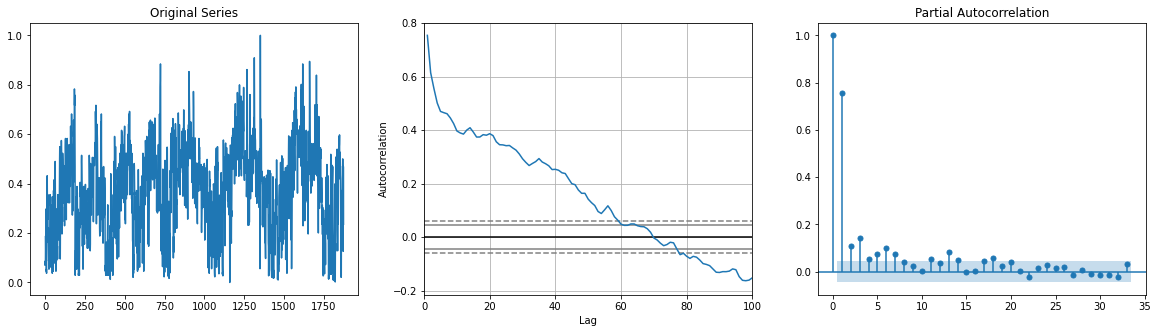

In [9]:
#Ο3
#After checking the results above, the time series that need differencing is Paris_Data['o3'],
#as p-value for o3 : 0.229985 > 0.05
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['o3']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['o3'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['o3'], ax=axes[2])

plt.show()

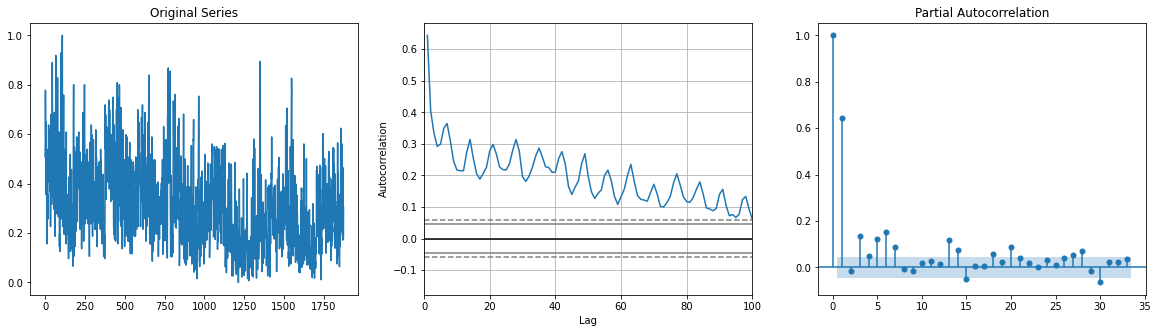

In [10]:
#NO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['no2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['no2'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['no2'], ax=axes[2])

plt.show()

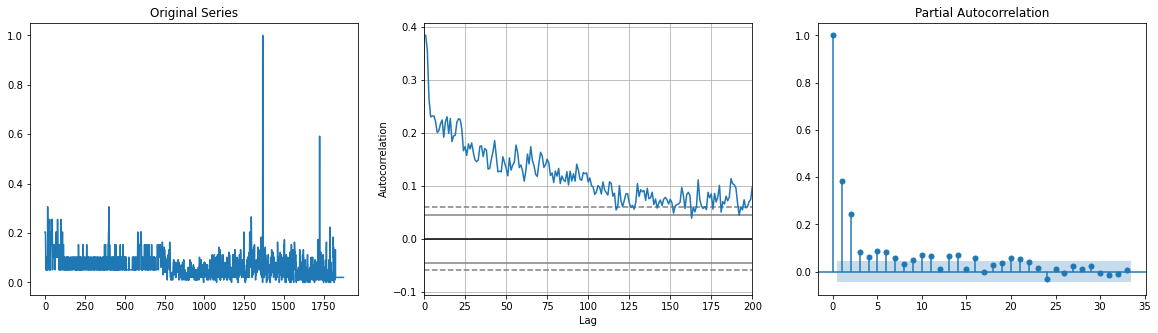

In [11]:
#SO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['so2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['so2'], ax=axes[1])
pl.set_xlim([0,200])
plot_pacf(Paris_Data['so2'], ax=axes[2])

plt.show()

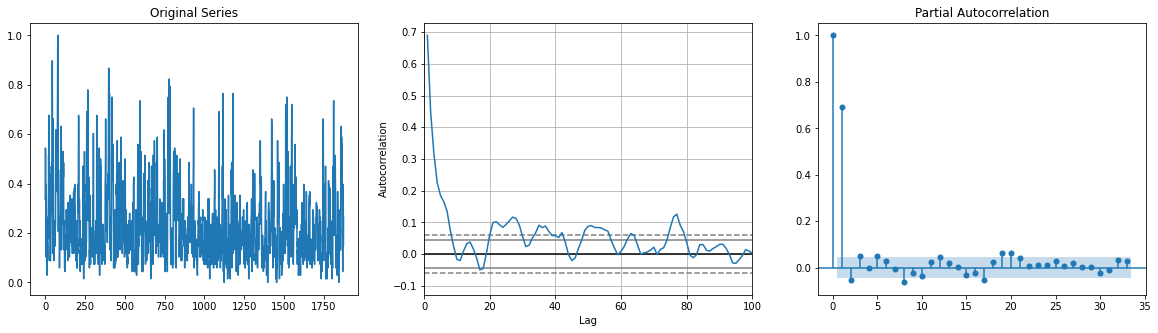

In [12]:
#PM10
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['pm10']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['pm10'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['pm10'], ax=axes[2])

plt.show()

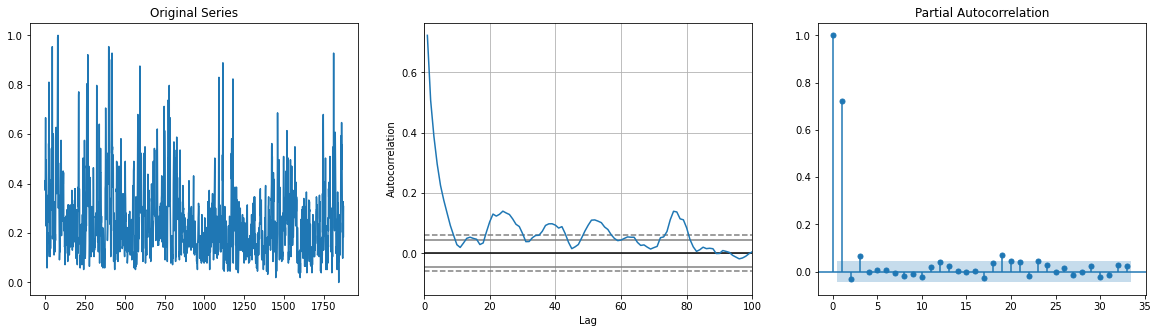

In [13]:
#PM2.5
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Paris_Data['pm25']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Paris_Data['pm25'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Paris_Data['pm25'], ax=axes[2])

plt.show()

In [14]:
#Για κάθε στήλη φτιάχνονται τα διαγράμματα autocorrelation και partial autocorrelation 
#ώστε να προσδιοριστούν που παράμετροι του Autoregression (p) και Moving Average (q).  
#Το p το βρίσκουμε από το partial autocorrelation plot, μετρώντας πόσα σημεία βρίσκονται 
#εκτός της μπλε σκιασμένης περιοχής. Το q το βρίσκουμε με αντίστοιχο τρόπο από το autocorrelation plot.

In [53]:
#params = (p,d,q)

def manual_ARIMA(data, params):
    
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #'fitted_values' IS GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    fitted_values = [x for x in train]

    for t in range(len(test)):
        #MODEL
        model = ARIMA(fitted_values, order=params)
        model_fit = model.fit()
        #print(model_fit.summary())
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        fitted_values.append(test.iloc[t])

    #error = math.sqrt(mean_squared_error(test, predictions))
    return predictions, test

In [60]:
import itertools
import warnings
warnings.filterwarnings('ignore')
# Grid Search

def arima_grid_search(df, pollutant):

    p = q = range(5,11)
    d = [0]
    pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
    combs = {}
    aics = []
    # Grid Search Continued
    for combination in pdq:
        model = ARIMA(df, order=combination)
        model = model.fit()
        #print(model.summary())
        combs.update({model.aic : [combination]})
        aics.append(model.aic)
            
    best_aic = min(aics)
    
    print('best AIC is: ', best_aic)
    print ('ARIMA parameters: ', '\n', 'p: ', combs[best_aic][0][0], '\n', 'd: 0', '\n', 'q: ',combs[best_aic][0][2])
    
    forecast, test = manual_ARIMA(df, (combs[best_aic][0][0], 0, combs[best_aic][0][2]))
    forecast = pd.Series(forecast)
    forecast.index = test.index
    
    print("ARIMA MSE for Paris " + str(pollutant)+" " + str(mean_squared_error(test, forecast)))
    print("ARIMA RMSE for Paris " + str(pollutant)+" "  + str(math.sqrt(mean_squared_error(test, forecast))))
    print("ARIMA MAE for Paris "+ str(pollutant)+" "  + str(mean_absolute_error(test, forecast)))
    
    title = "ARIMA for Paris" + "[" + str(pollutant) +"]"
    plt.figure(figsize=(20, 5))
    plt.title(title)
    plt.plot(test, label='Actual Data', color='blue')
    plt.plot(forecast, label='Predicted Data', color='orange')
    plt.show()

    return

best AIC is:  -2849.0204556802955
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  8
ARIMA MSE for Paris o3 0.015201509773566494
ARIMA RMSE for Paris o3 0.12329440284768199
ARIMA MAE for Paris o3 0.09500780794616633


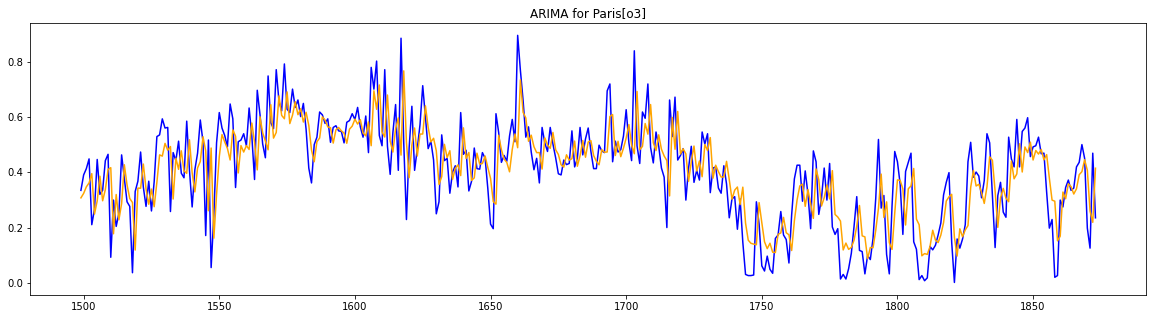

best AIC is:  -2605.0324563817203
ARIMA parameters:  
 p:  9 
 d: 0 
 q:  7
ARIMA MSE for Paris no2 0.01273396420226594
ARIMA RMSE for Paris no2 0.11284486785966803
ARIMA MAE for Paris no2 0.08739367948332859


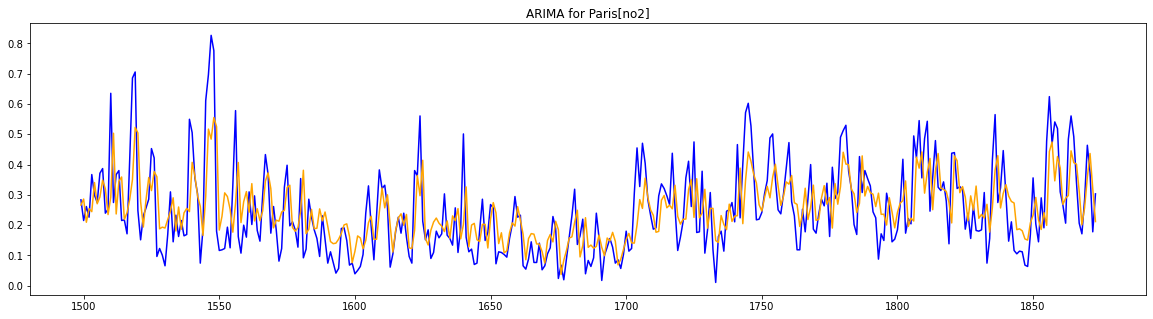

best AIC is:  -6391.491949805712
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris so2 0.10447993223023919
ARIMA RMSE for Paris so2 0.3232335567824591
ARIMA MAE for Paris so2 0.04733065558864517


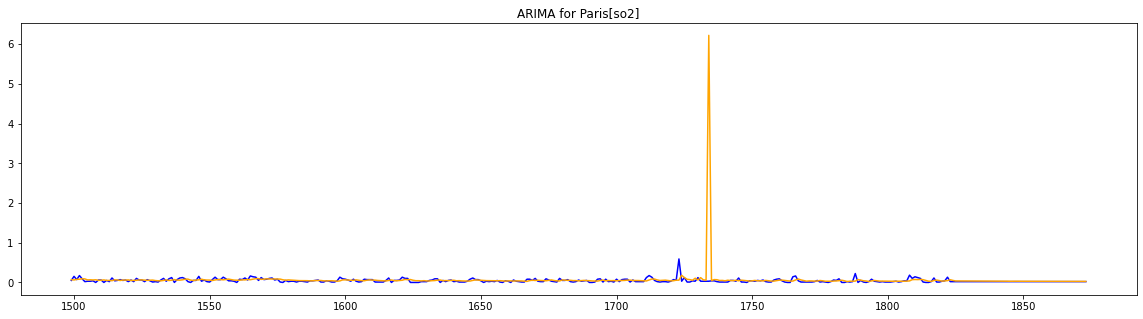

best AIC is:  -3100.914741751086
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris pm10 0.011593010857664477
ARIMA RMSE for Paris pm10 0.10767084497515786
ARIMA MAE for Paris pm10 0.08013597871119554


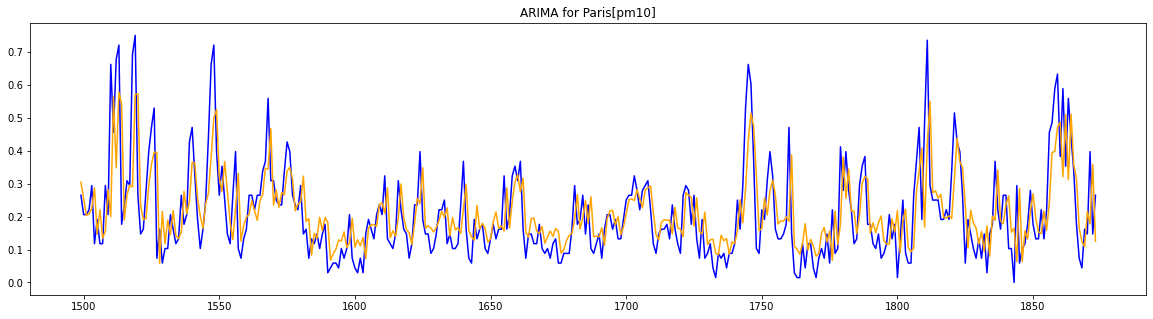

best AIC is:  -3219.9565024284566
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  6
ARIMA MSE for Paris pm25 0.009610765141337406
ARIMA RMSE for Paris pm25 0.0980345099510239
ARIMA MAE for Paris pm25 0.0742366884392185


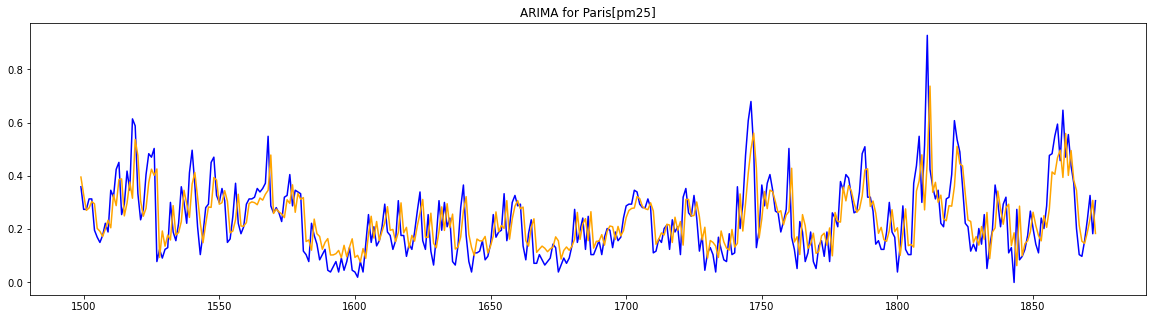

In [61]:
#O3
arima_grid_search(Paris_Data['o3'], 'o3')
#NO2
arima_grid_search(Paris_Data['no2'], 'no2')
#SO2
arima_grid_search(Paris_Data['so2'], 'so2')
#PM10
arima_grid_search(Paris_Data['pm10'], 'pm10')
#PM25
arima_grid_search(Paris_Data['pm25'], 'pm25')

## Repeat process for less data

In [63]:
import pandas as pd
Athens_Data = pd.read_csv('Athens_Data.csv', index_col=0)

data_to_drop = len(Paris_Data) - len(Athens_Data)
Paris_less_data = Paris_Data.iloc[data_to_drop: , :]
len(Paris_less_data)

839

best AIC is:  -1182.7823928169519
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Paris o3 0.014951395198325425
ARIMA RMSE for Paris o3 0.12227589786350139
ARIMA MAE for Paris o3 0.10030644086465827


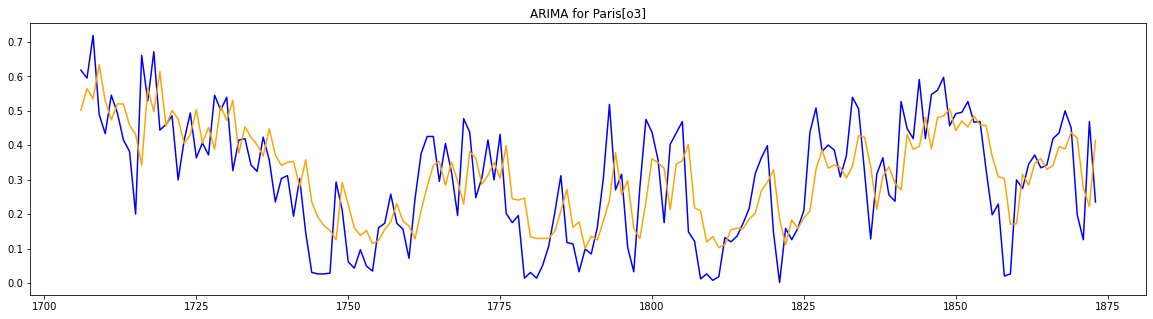

best AIC is:  -1358.9326846729246
ARIMA parameters:  
 p:  9 
 d: 0 
 q:  10
ARIMA MSE for Paris no2 0.012887390133234264
ARIMA RMSE for Paris no2 0.1135226415004261
ARIMA MAE for Paris no2 0.09163105811342048


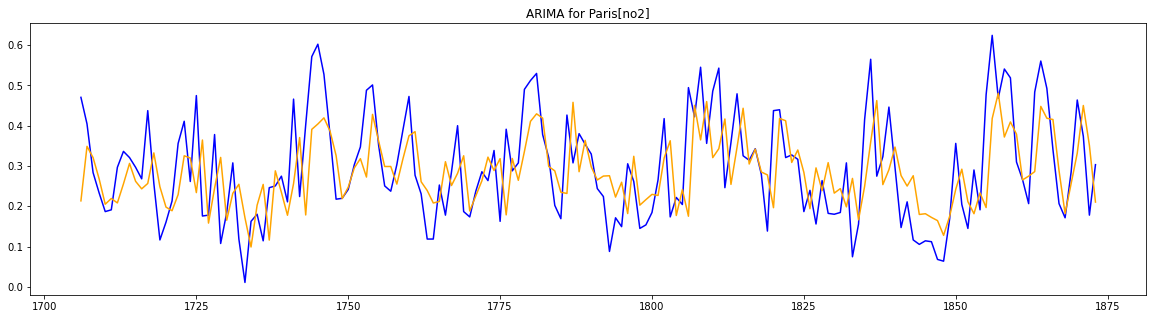

best AIC is:  -2525.7736388345456
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Paris so2 0.0032758824248067015
ARIMA RMSE for Paris so2 0.05723532497336502
ARIMA MAE for Paris so2 0.03370371288368872


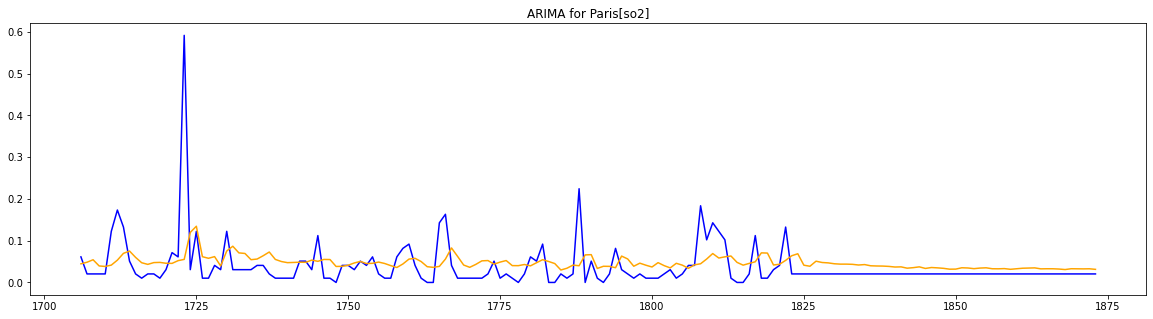

best AIC is:  -1480.7913841954155
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  6
ARIMA MSE for Paris pm10 0.012641868768860759
ARIMA RMSE for Paris pm10 0.11243606524981546
ARIMA MAE for Paris pm10 0.08561831988397696


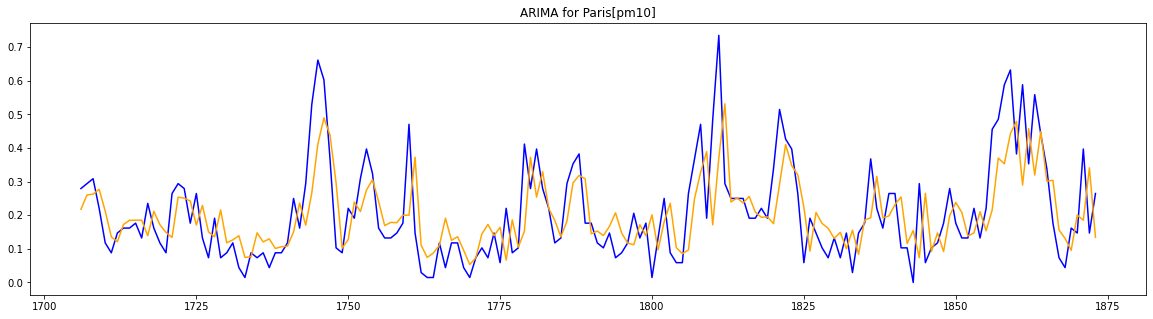

best AIC is:  -1576.7999758251572
ARIMA parameters:  
 p:  9 
 d: 0 
 q:  5
ARIMA MSE for Paris pm25 0.012878632543681268
ARIMA RMSE for Paris pm25 0.11348406295018375
ARIMA MAE for Paris pm25 0.08485785946292787


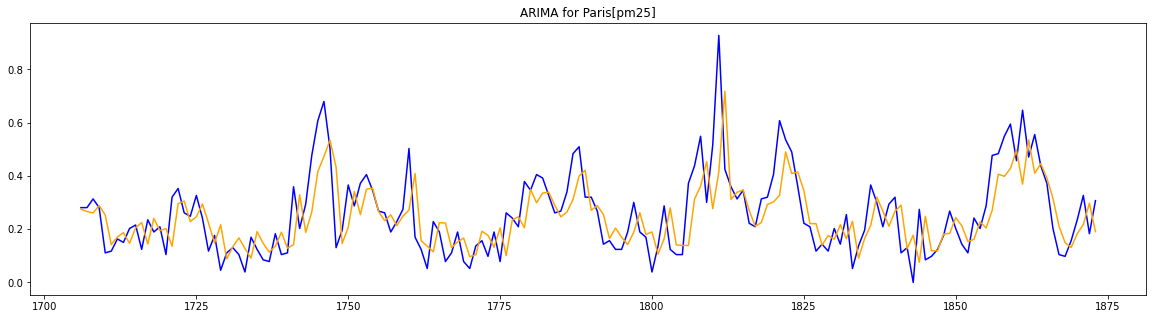

In [65]:
#O3
arima_grid_search(Paris_less_data['o3'], 'o3')
#NO2
arima_grid_search(Paris_less_data['no2'], 'no2')
#SO2
arima_grid_search(Paris_less_data['so2'], 'so2')
#PM10
arima_grid_search(Paris_less_data['pm10'], 'pm10')
#PM25
arima_grid_search(Paris_less_data['pm25'], 'pm25')